# Library

In [ ]:
from google.colab import files
import io
import requests
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


import library

# Kelola Dataset

In [ ]:
#uploaded = files.upload()
# url = 'https://raw.githubusercontent.com/syamsulrizal123/SLO/main/data_cancer.csv'
url = '/content/drive/MyDrive/ismad jembut cyber/kddcup.data_10_percent_corrected'
dataset = pd.read_csv(url)
dataset.head(5)

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,8,8.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,9,9.1,1.00.1,0.00.6,0.11.1,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


mengupload dataset

In [ ]:
dataset.shape

(494020, 42)

In [ ]:
dataset.isnull().sum()

0          0
tcp        0
http       0
SF         0
181        0
5450       0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
1          0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
8          0
8.1        0
0.00       0
0.00.1     0
0.00.2     0
0.00.3     0
1.00       0
0.00.4     0
0.00.5     0
9          0
9.1        0
1.00.1     0
0.00.6     0
0.11.1     0
0.00.7     0
0.00.8     0
0.00.9     0
0.00.10    0
0.00.11    0
normal.    0
dtype: int64

In [ ]:
x = dataset.iloc[:, 4:40].values
y = dataset.iloc[:, 41].values


In [ ]:
print(y)
y.shape

['normal.' 'normal.' 'normal.' ... 'normal.' 'normal.' 'normal.']


(494020,)

# PCA Data Banyak

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,0.399896,2.511664
1,0.379871,2.470886
2,0.352281,2.426885
3,0.326322,2.382545
4,0.294426,2.334299


In [ ]:
pd_y = pd.DataFrame(y, columns = ['target'])
pd_y.head()


,target
0,normal.
1,normal.
2,normal.
3,normal.
4,normal.


In [ ]:
finalDf = pd.concat([principalDf, pd_y[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,0.399896,2.511664,normal.
1,0.379871,2.470886,normal.
2,0.352281,2.426885,normal.
3,0.326322,2.382545,normal.
4,0.294426,2.334299,normal.


/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


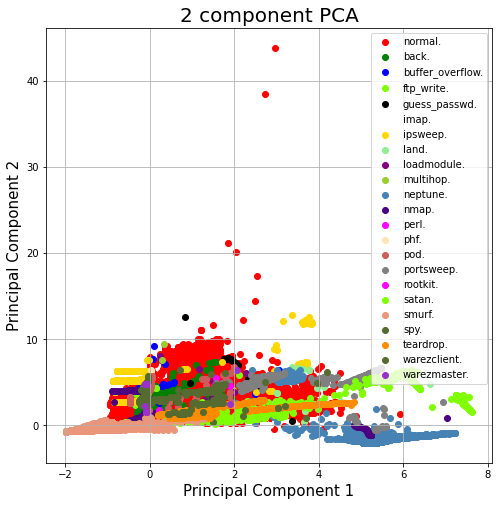

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['normal.','back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.', 'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.', 'neptune.', 'nmap.', 'perl.', 'phf.', 'pod.', 'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.', 'warezclient.', 'warezmaster.']
colors = ['r', 'g','b','#7FFF00','#000000','white','#FFD700','#90EE90','#800080','#9ACD32','#4682B4','#4B0082','#FF00FF','#FFE4B5','#CD5C5C','#808080','#FF00FF','#7FFF00','#E9967A','#556B2F','#FF8C00','#556B2F','#9932CC']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

# ANN MLP

In [ ]:
dataset_clas1 = finalDf
y_clas1 = dataset_clas1['target']
x_clas1 = dataset_clas1.drop(['target'], axis=1)

print ("dataset : ",dataset_clas1.shape)
print ("x : ",x_clas1.shape)
print ("y : ",y_clas1.shape)

dataset :  (494020, 3)
x :  (494020, 2)
y :  (494020,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_clas1, y_clas1, test_size = 0.2, random_state = 42)

membagi data train dan data test

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=600)
hasil =mlp.fit(X_train,y_train)

In [ ]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('accuracy is ',accuracy_score(predictions,y_test))

[[  211     0     0     0     0     0     0     0     0     0   220     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     8     0
      0     1     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     1     0     0     0     0     0     0     6     0
      0     1     0     0     0     0     0     0]
 [    0     0     0     0     1     0     0     0     0     0     2     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     1     0   230     0     0     0     0    30     0
      0     2     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     2     0
      0     0     0     1     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0     0]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

           back.       0.93      0.49      0.64       431
buffer_overflow.       0.00      0.00      0.00         9
      ftp_write.       0.00      0.00      0.00         1
   guess_passwd.       0.33      0.12      0.18         8
           imap.       1.00      0.33      0.50         3
        ipsweep.       0.96      0.87      0.92       263
           land.       0.00      0.00      0.00         3
     loadmodule.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00     21410
           nmap.       0.00      0.00      0.00        43
         normal.       0.96      1.00      0.98     19368
            phf.       0.00      0.00      0.00         1
            pod.       0.00      0.00      0.00        40
      portsweep.       0.89      0.96      0.92       224
        rootkit.       0.00      0.00      0.00         1
          satan.       0.97      0.89      0.93       307
          smu

['back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.' 'imap.'
 'ipsweep.' 'land.' 'loadmodule.' 'multihop.' 'neptune.' 'nmap.' 'normal.'
 'perl.' 'phf.' 'pod.' 'portsweep.' 'rootkit.' 'satan.' 'smurf.' 'spy.'
 'teardrop.' 'warezclient.' 'warezmaster.']


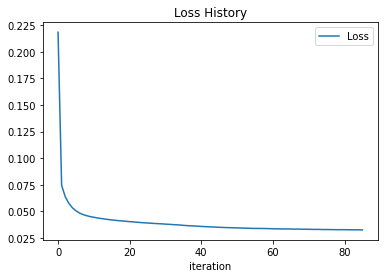

In [ ]:
import matplotlib.pyplot as plt
print(hasil.classes_)
plt.plot(hasil.loss_curve_)
plt.title('Loss History')
plt.xlabel('iteration')
plt.legend(['Loss'])